In [1]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
#from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC, LinearSVC
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import GaussianNB
#from sklearn.linear_model import Perceptron
#from sklearn.linear_model import SGDClassifier
#from sklearn.tree import DecisionTreeClassifier



In [2]:
dados = pd.read_csv('2007.csv',encoding='latin',low_memory=False)

In [3]:
dados['data_inversa'] =  pd.to_datetime(pd.Series(dados['data_inversa']), format="%d/%m/%Y")
dados['horario'] =  pd.to_datetime(pd.Series(dados['horario']), format="%H:%M:%S")
dados['horario'] =  dados['horario'].apply(lambda x: x.strftime('%H'))


In [4]:
fase_dia={'(null)':None,
          'Amanhecer':'Dawn',
          'Anoitecer':'Nightfall',
          'Plena noite':'Full night',
          'Pleno dia':'Full day'}


dia_semana={'Segunda':'Monday',
            'Terça':'Tuesday',
            'Quarta':'Wednesday',
            'Quinta':'Thursday',
            'Sexta':'Friday',
            'Sábado':'Saturday',
            'Domingo':'Sunday'}

dados['fase_dia'] = dados['fase_dia'].map(fase_dia).astype(str)
dados['dia_semana'] = dados['dia_semana'].map(dia_semana).astype(str)



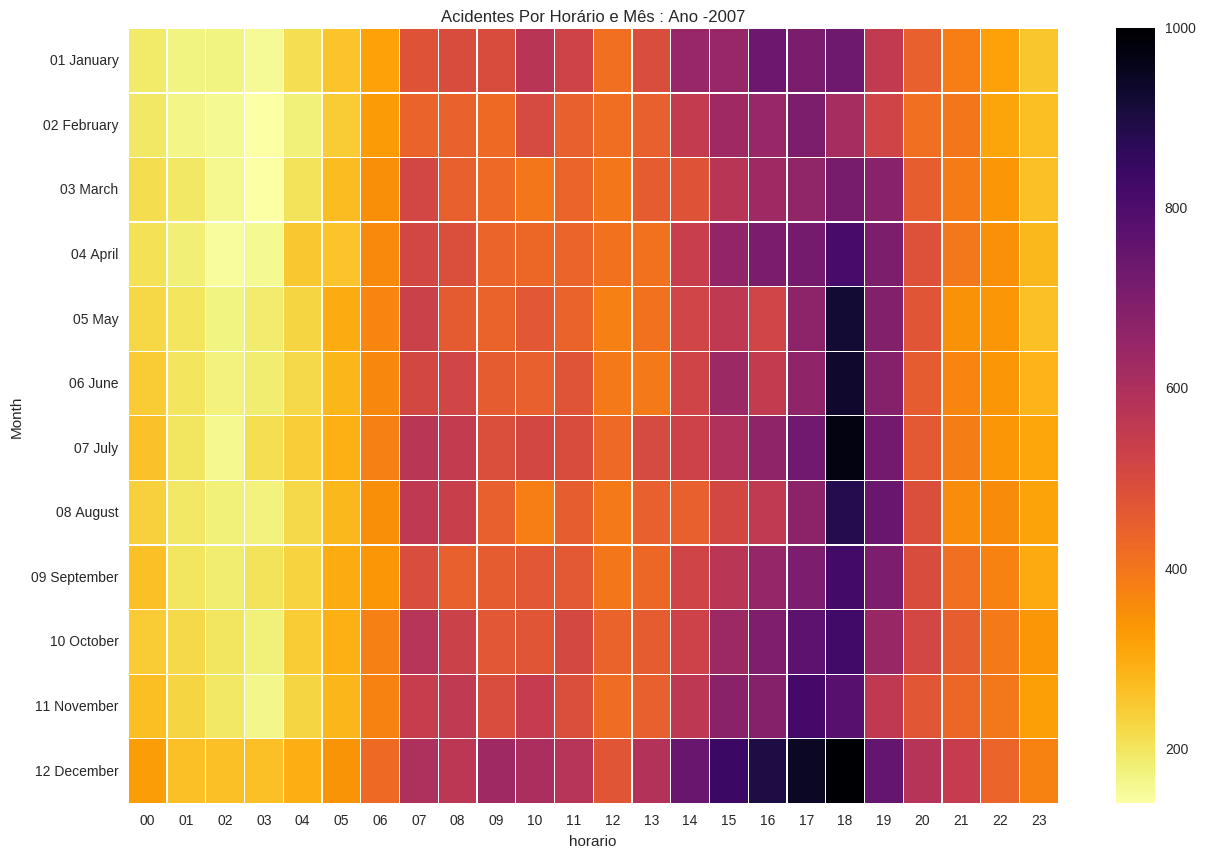

In [9]:
g = dados.groupby(['horario','data_inversa'],as_index=False).count().iloc[:,range(3)]
g = g.dropna()
g.rename(columns={'id':'total'},inplace=True)
g['Month'] = g['data_inversa'].apply(lambda x: x.strftime('%m %B'))
p=pd.pivot_table(g, values='total', index=['Month'] , columns=['horario'], aggfunc=np.sum)

fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(p,linewidths=.2,cmap='inferno_r')
ax.set_title(label="Acidentes Por Horário e Mês : Ano -2007")

